In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df= pd.DataFrame(digits.data,columns=digits.feature_names)

In [5]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['target'] = digits.target

In [7]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
df3 = df[df.target == 3]
df4 = df[df.target == 4]
df5 = df[df.target == 5]
df6 = df[df.target == 6]
df7 = df[df.target == 7]
df8 = df[df.target == 8]
df9 = df[df.target == 9]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),df.target,test_size = 0.2)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  print('k = '+ str(i) + ' and score is '+str(knn.score(X_test, y_test)))


k = 3 and score is 0.9777777777777777
k = 4 and score is 0.975
k = 5 and score is 0.975
k = 6 and score is 0.975
k = 7 and score is 0.9805555555555555
k = 8 and score is 0.9722222222222222
k = 9 and score is 0.9777777777777777
k = 10 and score is 0.975
k = 11 and score is 0.9805555555555555
k = 12 and score is 0.9722222222222222
k = 13 and score is 0.9777777777777777
k = 14 and score is 0.9777777777777777


In [10]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors' : range(3,15)
},cv=5,return_train_score=False)
clf.fit(df.drop(['target'],axis='columns'),df.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 15)})

In [11]:
scores = pd.DataFrame(clf.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003668,0.000423,0.024274,0.002950,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,1
1,0.003604,0.000099,0.026693,0.000781,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,2
2,0.003778,0.000278,0.033937,0.011403,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,3
3,0.004781,0.002297,0.027707,0.001344,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,5
4,0.003779,0.000177,0.027209,0.000617,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,4


In [12]:
scores[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,3,0.966622
1,4,0.963841
2,5,0.962728
3,6,0.959386
4,7,0.959946
5,8,0.958276
6,9,0.956611
7,10,0.954943
8,11,0.955498
9,12,0.956608


In [15]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm =confusion_matrix(y_test,y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  1, 36]])

Text(0.5, 24.0, 'Predicted')

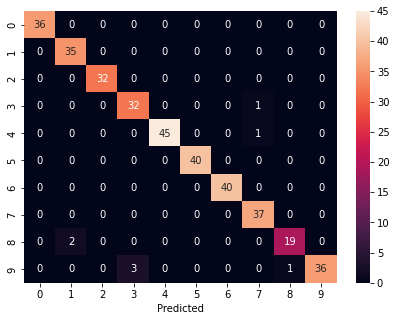

In [20]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Truth")
plt.xlabel("Predicted")

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        32
           3       0.91      0.97      0.94        33
           4       1.00      0.98      0.99        46
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       0.95      1.00      0.97        37
           8       0.95      0.90      0.93        21
           9       1.00      0.90      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

